<a href="https://colab.research.google.com/github/parisamhmd/AppIntroduction_Template/blob/main/dataProject01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from mlxtend.preprocessing import TransactionEncoder
import csv
import scipy.stats as stats
import itertools

In [5]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/groceries.csv")
data1=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/groceries_reshape.csv")


# New Section

In [7]:
#finding unique items sorted based on alphabet
new_df = data1.stack()
unique_items=sorted(list(set(new_df.values)), key=lambda v: v.upper())
print((unique_items))


['abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'baby food', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegetables', 'fruit/vegetable juice', 'grapes', 'hair spray

In [8]:
tmp=np.zeros((9835,169))
transactions=data.values

In [9]:
#fill tmp with 1 when the item is the hole dataset is availabe
for i in  range(0, len(transactions)):
  for y in transactions[i]:
    if(type(y)==str):
      tmp[i][unique_items.index(y.strip())]=1

In [10]:
#convert np array to pandas data fram
datax=pd.DataFrame(tmp, columns = unique_items)
datax.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,...,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
#find the transactions that each unique item occured on it and save it in itemTransactions
#find the frequency of occurence and save it in occurences_number
#find the frequency of occurence and the name of item and save it in occurences_dict
itemTransactions=[]
occurences_dict=[]
occurences_number=[]
for x in unique_items:
  tmp=datax.index[datax[x] == 1.0].tolist()
  itemTransactions.append([x,tmp,len(tmp)])
  occurences_number.append(len(tmp))
  occurences_dict.append([len(tmp),x])

  

In [12]:
print(len(itemTransactions))

169


In [13]:
datax.describe()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,...,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,...,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000
mean,0.003559,0.003254,0.000610,0.000102,0.000407,0.017692,0.002745,0.052466,0.033249,0.026029,0.080529,0.110524,0.004169,0.064870,0.055414,0.027961,0.013218,0.008948,0.029893,0.077682,0.015048,0.003254,0.010778,0.023284,0.005694,0.021047,0.042908,0.049619,0.009049,0.082664,0.005084,0.011388,0.002237,0.058058,0.010269,0.002542,0.002745,0.001322,0.039654,0.053279,...,0.005491,0.093950,0.014235,0.017590,0.098526,0.003559,0.024504,0.003050,0.002644,0.174377,0.017082,0.005491,0.000102,0.006812,0.005592,0.027351,0.008541,0.030402,0.003660,0.001729,0.005186,0.011185,0.033859,0.009049,0.003254,0.003864,0.002339,0.000712,0.104931,0.008134,0.033452,0.006507,0.038434,0.071683,0.000813,0.042095,0.019014,0.255516,0.139502,0.006914
std,0.059552,0.056951,0.024693,0.010084,0.020164,0.131836,0.052326,0.222976,0.179294,0.159231,0.272124,0.313557,0.064435,0.246309,0.228799,0.164871,0.114213,0.094173,0.170301,0.267684,0.121751,0.056951,0.103261,0.150812,0.075247,0.143549,0.202660,0.217167,0.094701,0.275388,0.071124,0.106110,0.047245,0.233865,0.100822,0.050356,0.052326,0.036335,0.195156,0.224601,...,0.073899,0.291774,0.118464,0.131463,0.298039,0.059552,0.154617,0.055148,0.051351,0.379453,0.129583,0.073899,0.010084,0.082260,0.074576,0.163113,0.092026,0.171698,0.060393,0.041542,0.071828,0.105169,0.180875,0.094701,0.056951,0.062042,0.048305,0.026670,0.306481,0.089827,0.179823,0.080409,0.192252,0.257975,0.028510,0.200815,0.136580,0.436173,0.346487,0.082867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [14]:
#find occurence of all the items

maxValue=max(occurences_number)
minValue=min(occurences_number)
maxItem=unique_items[occurences_number.index(maxValue)]
minItem=unique_items[occurences_number.index(minValue)]
print(minItem,maxItem,maxValue,minValue)
print(occurences_dict)

baby food whole milk 2513 1
[[35, 'abrasive cleaner'], [32, 'artif. sweetener'], [6, 'baby cosmetics'], [1, 'baby food'], [4, 'bags'], [174, 'baking powder'], [27, 'bathroom cleaner'], [516, 'beef'], [327, 'berries'], [256, 'beverages'], [792, 'bottled beer'], [1087, 'bottled water'], [41, 'brandy'], [638, 'brown bread'], [545, 'butter'], [275, 'butter milk'], [130, 'cake bar'], [88, 'candles'], [294, 'candy'], [764, 'canned beer'], [148, 'canned fish'], [32, 'canned fruit'], [106, 'canned vegetables'], [229, 'cat food'], [56, 'cereals'], [207, 'chewing gum'], [422, 'chicken'], [488, 'chocolate'], [89, 'chocolate marshmallow'], [813, 'citrus fruit'], [50, 'cleaner'], [112, 'cling film/bags'], [22, 'cocoa drinks'], [571, 'coffee'], [101, 'condensed milk'], [25, 'cooking chocolate'], [27, 'cookware'], [13, 'cream'], [390, 'cream cheese'], [524, 'curd'], [50, 'curd cheese'], [15, 'decalcifier'], [57, 'dental care'], [365, 'dessert'], [189, 'detergent'], [103, 'dish cleaner'], [173, 'dishe

In [15]:
y=sorted(occurences_number)
for x in y:
  print(x)
print("/////////////")
print(y.index(299))


1
1
2
4
4
6
6
7
8
8
8
9
10
11
12
13
15
15
16
17
17
19
20
22
22
23
23
25
26
27
27
28
29
30
31
32
32
32
33
35
35
36
38
41
41
42
42
44
45
50
50
50
51
53
54
54
55
56
57
59
60
64
64
67
68
71
73
75
78
79
80
82
83
84
84
88
89
89
90
91
93
101
101
102
103
106
106
106
109
110
112
115
118
128
130
140
148
148
160
163
168
170
171
173
173
174
176
187
189
189
207
220
229
241
241
246
254
256
256
269
275
276
279
279
294
299
305
324
327
327
329
333
365
368
372
378
390
414
422
473
488
515
516
524
545
567
571
575
580
624
638
705
711
744
764
785
792
813
875
924
969
1032
1072
1087
1372
1715
1809
1903
2513
/////////////
125


In [16]:
def findingBondaries(Q1,Q3):
  measures=(Q3-Q1)*1.5
  lowerLimit=Q1-measures
  upperLimit=Q3+measures
  yield lowerLimit,upperLimit


(array([[166.,   0.,   0., ...,   0.,   0.,   3.],
        [168.,   0.,   0., ...,   0.,   0.,   1.],
        [165.,   0.,   0., ...,   0.,   0.,   4.],
        ...,
        [165.,   0.,   0., ...,   0.,   0.,   4.],
        [164.,   0.,   0., ...,   0.,   0.,   5.],
        [169.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 9835 Lists of Patches objects>)

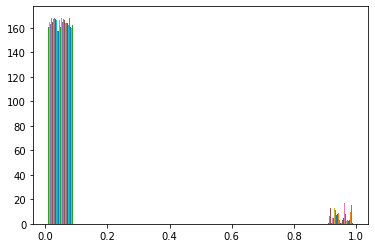

In [17]:
plt.hist(datax)

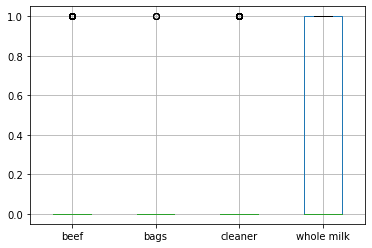

In [18]:
datax.boxplot(column=['beef','bags','cleaner','whole milk'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca5367fc90>,
      dtype=object)

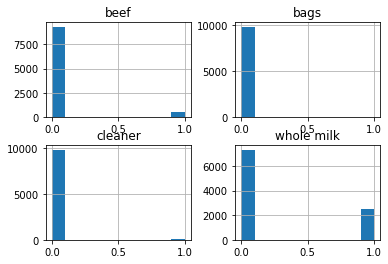

In [19]:
datax.hist(column=['beef','bags','cleaner','whole milk'])

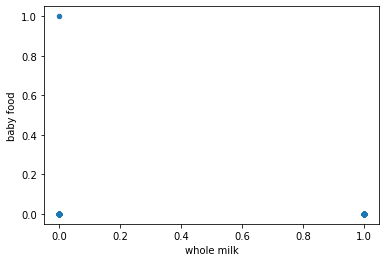

In [20]:
datax.plot.scatter(x='whole milk',y='baby food')

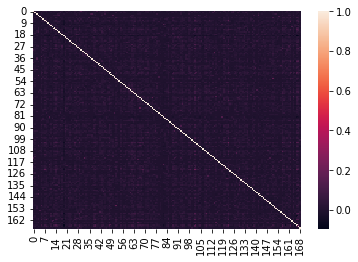

In [21]:
corrMat=np.array(datax.corr())
sbs.heatmap(corrMat)

In [22]:
#minimum support value for algorithm should be 60% of number of transactions
#with 60% the minSupp is 5901 which means there is no items set with length=1
#with 30% the minSupp is 2950 , like 60%
#with 10% the eminSupp is 983 therefore 8 items are accepted
#with 5% the minSupp is 491 therefore 28 items are accepted
#with 3% the minSupp is 295 therefore 44 items are accepted
#with 2% the minSupp is 196 therefore 59 items are accepted
#with 1% the minSupp is 98 therefore 89 items are accepted
#with 0.5% the minSupp is 49 therefore 121 items are accepted 
#total number of items is 169
minSupport=int((9835*0.5)/100)
#minSupport=0.005
print(minSupport)

49


In [23]:

def createSubSet(s,n):
  result=[]
  #return [list(i) for i in itertools.combinations(s, n)]
  for i in itertools.combinations(s, n):
    items=[i[0][0],i[1][0]]
    trans=list(set(i[0][1]) & set(i[1][1]))
    occureNo=len(trans)
    result.append([items,trans,occureNo])
  return result

In [24]:
for i in itertools.combinations(itemTransactions, 2):
  items=[i[0][0],i[1][0]]
  trans=list(set(i[0][1]) & set(i[1][1]))
  occureNo=len(trans)
  print(items)
  print(trans)
  print(occureNo)
  print(".////////////////////////////////////////")

Streaming output truncated to the last 5000 lines.
['ready soups', 'specialty bar']
[7177]
1
.////////////////////////////////////////
['ready soups', 'specialty cheese']
[]
0
.////////////////////////////////////////
['ready soups', 'specialty chocolate']
[]
0
.////////////////////////////////////////
['ready soups', 'specialty fat']
[]
0
.////////////////////////////////////////
['ready soups', 'specialty vegetables']
[]
0
.////////////////////////////////////////
['ready soups', 'spices']
[2016]
1
.////////////////////////////////////////
['ready soups', 'spread cheese']
[]
0
.////////////////////////////////////////
['ready soups', 'sugar']
[9193]
1
.////////////////////////////////////////
['ready soups', 'sweet spreads']
[]
0
.////////////////////////////////////////
['ready soups', 'syrup']
[]
0
.////////////////////////////////////////
['ready soups', 'tea']
[]
0
.////////////////////////////////////////
['ready soups', 'tidbits']
[]
0
.////////////////////////////////////////


In [ ]:
#find l1
holeItemSets=[]
l1_items=[]
l1_dict=[]
l1_transactions=[]
for item,trans,occure in itemTransactions:
  if(occure>=minSupport):
    l1_items.append(item)
    l1_dict.append([item,occure])
    l1_transactions.append([item,trans,occure])
print((l1_dict))

In [ ]:
#find l2
l2_items=[]
l2_dict=[]
c2_dict=[]
l2_transactions=[]
tmp=[]
for x in createSubSet(l1_transactions,2):
  c2_dict.append([x[0],x[2]])
  if x[2]>=minSupport:
    l2_items.append(x[0])
    l2_dict.append([x[0],x[2]])
    l2_transactions.append([x[0],x[1],x[2]])
tmp=holeItemSets+l2_items
holeItemSets=tmp

In [27]:
for x in l2_items:
  print(x)
print(len(l2_items))

['baking powder', 'other vegetables']
['baking powder', 'whole milk']
['beef', 'bottled water']
['beef', 'butter']
['beef', 'citrus fruit']
['beef', 'domestic eggs']
['beef', 'fruit/vegetable juice']
['beef', 'margarine']
['beef', 'newspapers']
['beef', 'other vegetables']
['beef', 'pastry']
['beef', 'pork']
['beef', 'rolls/buns']
['beef', 'root vegetables']
['beef', 'sausage']
['beef', 'soda']
['beef', 'tropical fruit']
['beef', 'whipped/sour cream']
['beef', 'whole milk']
['beef', 'yogurt']
['berries', 'citrus fruit']
['berries', 'other vegetables']
['berries', 'rolls/buns']
['berries', 'root vegetables']
['berries', 'sausage']
['berries', 'shopping bags']
['berries', 'soda']
['berries', 'tropical fruit']
['berries', 'whipped/sour cream']
['berries', 'whole milk']
['berries', 'yogurt']
['beverages', 'other vegetables']
['beverages', 'rolls/buns']
['beverages', 'whole milk']
['beverages', 'yogurt']
['bottled beer', 'bottled water']
['bottled beer', 'brown bread']
['bottled beer', 'but

In [ ]:
"""l3_items=[]
l3_dict=[]
c3_dict=[]
l3_transactions=[]
for i in range(0,len(l2_transactions)):
  n=len(l2_transactions[i][0])
  flag=False
  for j in range(i+1,len(l2_transactions)):
    newItemSet=sorted(list(set(l2_transactions[i][0]+l2_transactions[j][0])), key=lambda v: v.upper())
    if l2_transactions[i][0][0]==l2_transactions[j][0][0]:
      for k in itertools.combinations(newItemSet,n):
        print(list(k))
        if list(k) in l2_items:
          flag=True
        else:
          flag=False
      #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
      if flag==True:
        trans=list(itertools.chain(l2_transactions[i][1],l2_transactions[j][1]))
        c3_dict.append([newItemSet,len(trans)])
        if(len(trans)>=minSupport):
          l3_items.append(newItemSet)
          l3_dict.append([newItemSet,len(trans)])
          l3_transactions.append([newItemSet,trans,len(trans)])
        #print(l2_transactions[i][0])
        #print(l2_transactions[j][0])
        #print(newItemSet)
        #print(list(itertools.chain(l2_transactions[i][1],l2_transactions[j][1])))
      #print(list(set(*l2_transactions[i][2],*l2_transactions[j][2])))
tmp=holeItemSets+l3_items
holeItemSets=tmp"""


In [29]:
for x in holeItemSets:
  print(x)
print("///////////////////////////////////////////////////////////////")

['baking powder', 'other vegetables']
['baking powder', 'whole milk']
['beef', 'bottled water']
['beef', 'butter']
['beef', 'citrus fruit']
['beef', 'domestic eggs']
['beef', 'fruit/vegetable juice']
['beef', 'margarine']
['beef', 'newspapers']
['beef', 'other vegetables']
['beef', 'pastry']
['beef', 'pork']
['beef', 'rolls/buns']
['beef', 'root vegetables']
['beef', 'sausage']
['beef', 'soda']
['beef', 'tropical fruit']
['beef', 'whipped/sour cream']
['beef', 'whole milk']
['beef', 'yogurt']
['berries', 'citrus fruit']
['berries', 'other vegetables']
['berries', 'rolls/buns']
['berries', 'root vegetables']
['berries', 'sausage']
['berries', 'shopping bags']
['berries', 'soda']
['berries', 'tropical fruit']
['berries', 'whipped/sour cream']
['berries', 'whole milk']
['berries', 'yogurt']
['beverages', 'other vegetables']
['beverages', 'rolls/buns']
['beverages', 'whole milk']
['beverages', 'yogurt']
['bottled beer', 'bottled water']
['bottled beer', 'brown bread']
['bottled beer', 'but

In [30]:
def listEquality(list1,list2,n):
  flag=False
  for i in range(0, n):
    #print(list1[i],list2[i])
    #print("KKKKKKKKKKKKKKKKKKKKKKKKK")
    if list1[i]==list2[i]:
      flag=True
    else:
      flag=False
  return flag


In [31]:
def get_frequent_itemSet(lTransaction,lItem,minSup):
  ln_items=[]
  ln_dict=[]
  cn_dict=[]
  ln_transactions=[]
  for i in range(0,len(lTransaction)):
    n=len(lTransaction[i][0])
    #print("NNNNNNNNNNNNNNNNNNNNNNNN  "+str(n)+"   NNNNNNNNNNNNNNNNNNNNNNN")
    flag=False
    for j in range(i+1,len(lTransaction)):
      #print(lTransaction[i][0])
      #print(lTransaction[j][0])
      res=listEquality(lTransaction[i][0],lTransaction[j][0],n-1)
      #print(res)
      if res==True:
        newItemSet=sorted(list(set(lTransaction[i][0]+lTransaction[j][0])), key=lambda v: v.upper())
      #if lTransaction[i][0][0]==lTransaction[j][0][0]:
        for k in itertools.combinations(newItemSet,n):
          #print(list(k))

          if list(k) in lItem:
            flag=True
          else:
            flag=False
        #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        if flag==True and newItemSet not in ln_items:
          #print(newItemSet)
          #print("{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{")
          #trans=list(itertools.chain(lTransaction[i][1],lTransaction[j][1]))
          trans=list(set(lTransaction[i][1])&set(lTransaction[j][1]))
          cn_dict.append([newItemSet,len(trans)])
          if(len(trans)>=minSup):
            ln_items.append(newItemSet)
            ln_dict.append([newItemSet,len(trans)])
            ln_transactions.append([newItemSet,trans,len(trans)])
            flag=False

  return [ln_items,ln_dict,ln_transactions]


In [43]:
#find l3
l3_items,l3_dict,l3_transactions=get_frequent_itemSet(l2_transactions,l2_items,minSupport)
tmp=holeItemSets+l3_items
holeItemSets=tmp

In [ ]:
print(len(l3_items))
#for x in l3_items:
 # print(x)

In [44]:
#find l4
l4_items,l4_dict,l4_transactions=get_frequent_itemSet(l3_transactions,l3_items,minSupport)
tmp=holeItemSets+l4_items
holeItemSets=tmp


In [35]:

for x in l4_items:
  print(x)


print(len(l4_items))

['citrus fruit', 'other vegetables', 'root vegetables', 'whole milk']
['citrus fruit', 'other vegetables', 'tropical fruit', 'whole milk']
['fruit/vegetable juice', 'other vegetables', 'whole milk', 'yogurt']
['other vegetables', 'pip fruit', 'root vegetables', 'whole milk']
['other vegetables', 'pip fruit', 'whole milk', 'yogurt']
['other vegetables', 'rolls/buns', 'root vegetables', 'whole milk']
['other vegetables', 'rolls/buns', 'whole milk', 'yogurt']
['other vegetables', 'root vegetables', 'tropical fruit', 'whole milk']
['other vegetables', 'root vegetables', 'tropical fruit', 'yogurt']
['other vegetables', 'root vegetables', 'whipped/sour cream', 'whole milk']
['other vegetables', 'root vegetables', 'whole milk', 'yogurt']
['other vegetables', 'tropical fruit', 'whole milk', 'yogurt']
['other vegetables', 'whipped/sour cream', 'whole milk', 'yogurt']
['root vegetables', 'tropical fruit', 'whole milk', 'yogurt']
14


In [36]:
#find l5
l5_items,l5_dict,l5_transactions=get_frequent_itemSet(l4_transactions,l4_items,minSupport)
tmp=holeItemSets+l5_items
holeItemSets=tmp


In [37]:

for x in l5_items:
  print(x)
print(len(l5_items))

0


In [38]:
#find l6
l6_items,l6_dict,l6_transactions=get_frequent_itemSet(l5_transactions,l5_items,minSupport)
tmp=holeItemSets+l6_items
holeItemSets=tmp

In [39]:
print(holeItemSets)

[['baking powder', 'other vegetables'], ['baking powder', 'whole milk'], ['beef', 'bottled water'], ['beef', 'butter'], ['beef', 'citrus fruit'], ['beef', 'domestic eggs'], ['beef', 'fruit/vegetable juice'], ['beef', 'margarine'], ['beef', 'newspapers'], ['beef', 'other vegetables'], ['beef', 'pastry'], ['beef', 'pork'], ['beef', 'rolls/buns'], ['beef', 'root vegetables'], ['beef', 'sausage'], ['beef', 'soda'], ['beef', 'tropical fruit'], ['beef', 'whipped/sour cream'], ['beef', 'whole milk'], ['beef', 'yogurt'], ['berries', 'citrus fruit'], ['berries', 'other vegetables'], ['berries', 'rolls/buns'], ['berries', 'root vegetables'], ['berries', 'sausage'], ['berries', 'shopping bags'], ['berries', 'soda'], ['berries', 'tropical fruit'], ['berries', 'whipped/sour cream'], ['berries', 'whole milk'], ['berries', 'yogurt'], ['beverages', 'other vegetables'], ['beverages', 'rolls/buns'], ['beverages', 'whole milk'], ['beverages', 'yogurt'], ['bottled beer', 'bottled water'], ['bottled beer',

In [40]:
print(l5_dict)

[]


ASSOCATION RULES

In [41]:
l_dict= dict()
for item in l1_dict:
  l_dict[str(item[0])]=item[1];

for item in l2_dict:
  l_dict[str(','.join(item[0]))]=item[1];

for item in l3_dict:
  l_dict[str(','.join(item[0]))]=item[1];  

for item in l4_dict:
  l_dict[str(','.join(item[0]))]=item[1];

for item in l5_dict:
  l_dict[str(','.join(item[0]))]=item[1];

for item in l6_dict:
  l_dict[str(','.join(item[0]))]=item[1];

print(l_dict)

{'baking powder': 174, 'beef': 516, 'berries': 327, 'beverages': 256, 'bottled beer': 792, 'bottled water': 1087, 'brown bread': 638, 'butter': 545, 'butter milk': 275, 'cake bar': 130, 'candles': 88, 'candy': 294, 'canned beer': 764, 'canned fish': 148, 'canned vegetables': 106, 'cat food': 229, 'cereals': 56, 'chewing gum': 207, 'chicken': 422, 'chocolate': 488, 'chocolate marshmallow': 89, 'citrus fruit': 813, 'cleaner': 50, 'cling film/bags': 112, 'coffee': 571, 'condensed milk': 101, 'cream cheese': 390, 'curd': 524, 'curd cheese': 50, 'dental care': 57, 'dessert': 365, 'detergent': 189, 'dish cleaner': 103, 'dishes': 173, 'dog food': 84, 'domestic eggs': 624, 'female sanitary products': 60, 'finished products': 64, 'flour': 171, 'flower (seeds)': 102, 'frankfurter': 580, 'frozen dessert': 106, 'frozen fish': 115, 'frozen meals': 279, 'frozen potato products': 83, 'frozen vegetables': 473, 'fruit/vegetable juice': 711, 'grapes': 220, 'ham': 256, 'hamburger meat': 327, 'hard cheese

In [82]:
import itertools
from operator import itemgetter

def findsubsets(s, n):
    return [set(i) for i in itertools.combinations(s, n)]

rules=[]

def get_arules(min_support=None,min_confidence=None,min_lift=None,sort_by='lift'):
  for itemSet in holeItemSets:
    subsets = []
    for i in range(1,len(itemSet)):
      subsets.extend(findsubsets(itemSet, i))
    for item in subsets: 
      set_difference = list(set(itemSet) - set(item)) 

      try:
        confidence =l_dict[",".join(set_difference)]/ l_dict[",".join(item)]
      except: 
        confidence=0

      try:
        support= l_dict[",".join(itemSet)]/ len(holeItemSets)
      except: 
        support=0

      try:
        lift=confidence/ ( l_dict[",".join(itemSet)]/ len(holeItemSets))
      except:
        lift=0;

      if(min_confidence is not None ):
        if(confidence >  min_confidence): 
          rules.append([item , " --> " ,set_difference , support, confidence, lift ])
      else:
        rules.append([item , " --> " ,set_difference , support, confidence, lift ])  
        
    print()

  sorted_rules= rules

  if(sortby=='lift'):
    sorted_rules= sorted(rules,key=itemgetter(5), reverse=True)

  elif(sorted=='confidence'):
    sorted_rules= sorted(rules, key=lambda a:a[4], reverse=True)

  elif(sorted=='support'):
    sorted_rules= sorted(rules, key=lambda a:a[3], reverse=True)

  for item in sorted_rules:
    print(item)

get_arules(None,0.2,None,None)